# Semester 3 Coding Portfolio Topic 2 Formative Part 2/2:
# Natural Language Processing: LLMs

This notebook covers the following topics:
 - Decision Trees
 - LLM usage
 - Bertopic

This notebook is expected to take around 5 hours to complete:
 - 2 hours for the formative part
 - 3 hours of self-study on the topics covered by this notebook

Like all topics in this portfolio, this topic is split into two sections:
 - Formative 
 - Summative

<b>Formative section</b><br>
Simply complete the given functions such that they pass the automated tests. This part is graded Pass/Fail; you must get 100% correct!
You can submit your notebook through Canvas as often as you like. Make sure to start doing so early to insure that your code passes all tests!
You may ask for help from fellow students and TAs on this section, and solutions might be provided later on.

This week's workshop is all about machine learning and NLP. We're going to start simple, using decision trees, and gradually move to more complex models.

To be able to use `transformers` library later on, use python 3.10+.


## Decision trees

Let's start with the simple decision trees that we learned about in the lecture. 

Decision trees are a type of supervised machine learning algorithm that is used for both classification and regression tasks. They work by repeatedly splitting the data into distinct nodes, which represent decision points based on the values of the input features. 


We will here use the decision tree to categorize data points in the Iris dataset.

The Iris dataset is one of the best-known and most frequently used datasets in the field of machine learning and statistics. It was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper titled "The use of multiple measurements in taxonomic problems." 

The dataset consists of 150 observations of iris flowers. There are three different species of iris included in the dataset:

- Iris setosa
- Iris versicolor
- Iris virginica

These have different petal lengths and widths. Our task is to train a decision tree so that it categorizes the flower species using these two properties.

Let's start by plotting the data, with the two features.

In [1]:
# If you haven't instaled scikit-learn, now's the time. It's our go-to library for ML.
!pip3 install scikit-learn

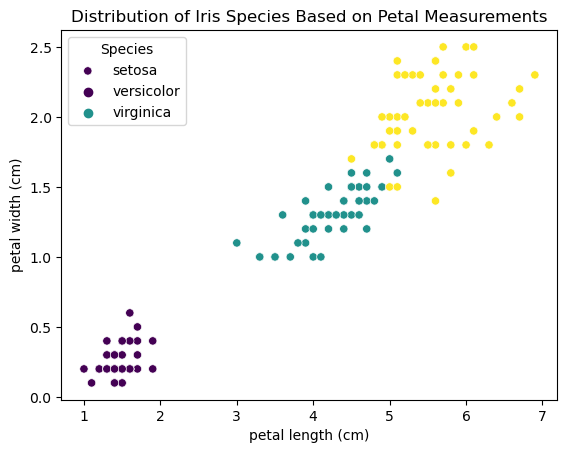

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
iris = load_iris()

# Convert the last two features (petal length and width) to a DataFrame
feature_names = iris.feature_names[2:4]  # This captures 'petal length (cm)' and 'petal width (cm)'
X = pd.DataFrame(iris.data[:, 2:4], columns=feature_names)
y = iris.target

# Add the target to the DataFrame for easier plotting
X['species'] = y

# Scatter plot for petal dimensions using seaborn for automatic legend handling
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue='species', palette='viridis')

plt.title('Distribution of Iris Species Based on Petal Measurements')
plt.legend(title='Species', labels=list(iris.target_names))
plt.show()


Now, let's train a Decision Tree to separate the three types of flowers!

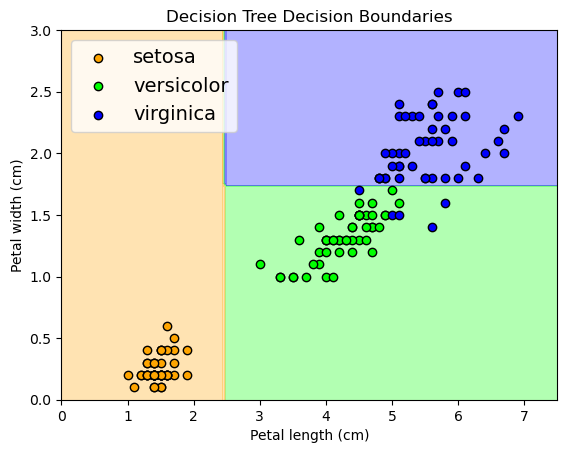

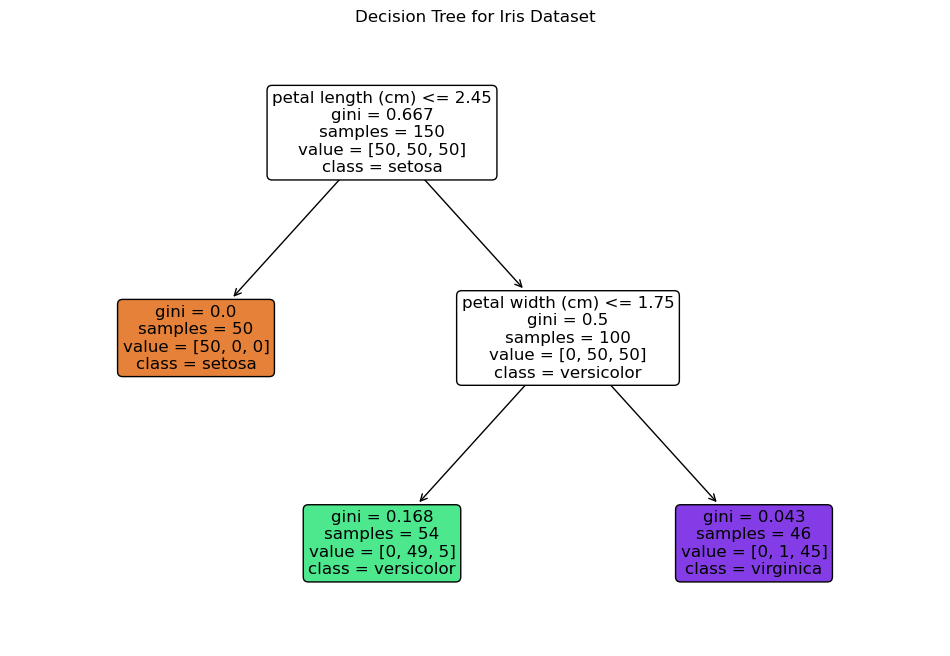

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Create and fit the model
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X.drop('species', axis=1), y)  # Ensure to drop the species column for training

def plot_decision_boundary(clf, X_df, axes=[0, 7.5, 0, 3]):
    # Define color map for consistent color usage in contourf and scatter plot
    cmap = ListedColormap(['#FFA500', '#00FF00', '#0000FF'])
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    X_new_df = pd.DataFrame(X_new, columns=X_df.columns[:-1])  # Use feature names
    y_pred = clf.predict(X_new_df).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    for i, class_name in enumerate(iris.target_names):
        plt.scatter(X_df[X_df['species'] == i].iloc[:, 0], X_df[X_df['species'] == i].iloc[:, 1], 
                    color=cmap(i), label=class_name, edgecolor='k')
    plt.axis(axes)
    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.legend(loc="upper left", fontsize=14)

# Plotting the decision boundary
plot_decision_boundary(tree_clf, X, [0, 7.5, 0, 3])
plt.title("Decision Tree Decision Boundaries")
plt.show()

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:4], class_names=iris.target_names, rounded=True, fontsize=12)
plt.title('Decision Tree for Iris Dataset')
plt.show()

### Exercise 1: New observations 

You come across some additional observations of flower petals. 
    [{'petal length (cm)': 5.1, 'petal width (cm)': 1.5},
    {'petal length (cm)': 4.5, 'petal width (cm)': 1.3},
    {'petal length (cm)': 6.0, 'petal width (cm)': 2.2}]

Can you identify their type manually by using the decision tree above? 

You can also use the model to do so, by using the .predict(X) function!


In [4]:
# Exercise 1: Predict Iris species
# Requirement: implement predict_iris_species(model, X) and assign the result to species_names_out (np.ndarray of strings)

new_observations = [
    {'petal length (cm)': 5.1, 'petal width (cm)': 1.5},
    {'petal length (cm)': 4.5, 'petal width (cm)': 1.3},
    {'petal length (cm)': 6.0, 'petal width (cm)': 2.2}
]

# Convert to DataFrame
new_df = pd.DataFrame(new_observations)


def predict_iris_species(model, X: pd.DataFrame) -> "np.ndarray":
    """Predict species names for Iris given petal features.

    Args:
        model: A fitted sklearn classifier (e.g., DecisionTreeClassifier).
        X (pd.DataFrame): A DataFrame with the same feature columns used for training.

    Returns:
        np.ndarray: Array of predicted Iris species names as strings.
    """
    # TODO 1: Use the fitted model to predict class labels for X.
    # TODO 2: Convert predicted numeric labels to species names using iris.target_names.
    from sklearn.datasets import load_iris
    
    # Load iris dataset to get target_names
    iris = load_iris()
    
    # Predict numeric labels
    predicted_labels = model.predict(X)
    
    # Convert numeric labels to species names
    species = np.array([iris.target_names[label] for label in predicted_labels])

    return species


species_names_out = predict_iris_species(tree_clf, new_df)
print("Predicted species:", species_names_out)





Predicted species: ['versicolor' 'versicolor' 'virginica']


## Let's revisit Trump's tweets!

Machine learning allows flexible annotation and prediction from textual data. It can be used for nearly any text analysis tasks. 

In our case, we will focus on whether there are differences in the messages when Trump posts from iPhone and Android. 

He began to post from iPhone when he started as President, and it seems these message might actually come from his aids.

We train machine learning to guess based on the text in the tweets whether he is sending the message from Android or iPhone. Can we predict it?

In [5]:
# We focus on the messages that are from iPhone or Android
# Note that this is a dataset introduced during the previous notebook! Make sure it is available.
df = pd.read_csv('sem3_topic2_nlp_formative1_data1.csv')
df = df.loc[df['device'].isin(set(['Twitter for iPhone', 'Twitter for Android']))] 


The following code:

1. Splits the dataset into training and testing sets.
2. Vectorizes the messages using a bag-of-words model, excluding common English stop words for more meaningful feature analysis.
3. Trains a RandomForestClassifier on the vectorized training data.
4. Predicts the device category on the test data and prints out the classification report and accuracy.
5. Extracts and prints the feature importances to see which words are the most discriminative in terms of predicting the device used.

The most important features output will give you insight into which words are more characteristic of messages sent from either iphone or android. Keep in mind that feature importance in random forests doesn't always equate to causality, and high importance might be due to correlation rather than a causal relationship.

In [6]:
# Train machine learning to identify 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
# The text is what we use to try to predict the device. 
# For time-purposes, we use only a subset of the data. Feel free to set subset to 42512 (full dataset) to train a more accurate model
# Make sure before submitting to CodeGrade to set subset back to 15000, as the process might otherwise time out.
subset = 15000
X_train, X_test, y_train, y_test = train_test_split(df['text'][:subset], df['device'][:subset], test_size=0.3, random_state=42)

# Vectorize the text messages into a bag-of-words model
vectorizer = CountVectorizer(stop_words='english') # Drop stopwords in English
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Use a machine learning classifier, in this case, a Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_vectorized, y_train)

# Predict the device used for the test set
predictions = classifier.predict(X_test_vectorized)

## This is the end of the ML code. Easy, no?
#-------
##### The rest is printing and evaluation ####

# Evaluate the classifier
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Get feature importances
feature_importances = classifier.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Map feature importances to their corresponding words
feature_importance_dict = {word: importance for word, importance in zip(feature_names, feature_importances)}

# Sort the words by their feature importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print out the most important features (words)
# for word, importance in sorted_feature_importances[:20]:  # top 20 words
#     print(f"Word: {word}, Importance: {importance}")

# After fitting the CountVectorizer on the training set
X_vectorized = vectorizer.transform(df['text'])

# Create a DataFrame with the word counts
word_counts = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Add the device column back to the DataFrame
word_counts['device'] = df['device'].values

# Calculate the sum of word counts for each device
word_counts_sum = word_counts.groupby('device').sum()

# Now you can compare the word counts for each word in your feature importances list
for device in word_counts['device'].unique():
    print(f'\n {device}')
    for word, importance in sorted_feature_importances[:40]:  # top 20 words
        counts = word_counts_sum[word]
        more_common_in = counts.idxmax()
        if more_common_in == device:
            print(f"{word}, Importance: {importance}")

                     precision    recall  f1-score   support

Twitter for Android       0.98      0.80      0.88       583
 Twitter for iPhone       0.97      1.00      0.98      3917

           accuracy                           0.97      4500
          macro avg       0.98      0.90      0.93      4500
       weighted avg       0.97      0.97      0.97      4500

Accuracy: 0.9724444444444444

 Twitter for iPhone
rt, Importance: 0.09132802309637895
https, Importance: 0.040231506974615854
syria, Importance: 0.011623164253979901
obamacare, Importance: 0.007885093258156504
obama, Importance: 0.0054726819178949745
thank, Importance: 0.0035891860479725394
biden, Importance: 0.0035296794648101482
president, Importance: 0.0034058503391441288
great, Importance: 0.0028616901581730476
amp, Importance: 0.0027976662641445303
democrats, Importance: 0.0022345416997123567
joe, Importance: 0.0021970116404471073
fake, Importance: 0.002194832136486312
news, Importance: 0.0021680418648995403

 Twitter 

## Exercise 2: Classifier: spam or ham?

Your task is to adapt the classifier above to identify if a text message is spam or not. 

We will us an existing database of text messages. 

How high accuracy can you achieve? 

In [7]:
# Load the spam file
df = pd.read_csv('sem3_topic2_nlp_formative2_data1.csv', encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Exercise 2 answer cell: Train a spam classifier.
# Requirement: implement train_spam_classifier(df) and assign outputs:
#   clf, vectorizer, spam_predictions, spam_y_test, spam_accuracy

def train_spam_classifier(df: pd.DataFrame):
    """Train a RandomForest spam classifier on SMS data.

    Args:
        df (pd.DataFrame): DataFrame with at least two columns:
            - 'v1': Label, either 'ham' or 'spam'.
            - 'v2': The message text.

    Returns:
        tuple:
            classifier (sklearn.ensemble.RandomForestClassifier): The trained model.
            vectorizer (sklearn.feature_extraction.text.CountVectorizer): Fitted text vectorizer.
            predictions (np.ndarray): Predicted labels for the test set.
            y_test (np.ndarray): Ground-truth labels for the test set.
            accuracy (float): Accuracy score of the model on the test set.
    """
    # TODO 1: Map column 'v1' to numeric labels {ham:0, spam:1}.
    # TODO 2: Split the dataset (test_size=0.3, random_state=42).
    # TODO 3: Use CountVectorizer(stop_words='english') to remove stop words.
    # TODO 4: Train a RandomForestClassifier(n_estimators=100, random_state=42).
    # TODO 5: Predict on the test set and compute accuracy.
    
    # Map 'v1' column to numeric labels
    df['label'] = df['v1'].map({'ham': 0, 'spam': 1})
    
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        df['v2'], df['label'], test_size=0.3, random_state=42
    )
    
    # Vectorize the text messages
    vectorizer = CountVectorizer(stop_words='english')
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    
    # Train RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train_vectorized, y_train)
    
    # Predict on test set
    predictions = classifier.predict(X_test_vectorized)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return classifier, vectorizer, predictions, y_test, accuracy


clf, vectorizer, spam_predictions, spam_y_test, spam_accuracy = train_spam_classifier(df)
print(classification_report(spam_y_test, spam_predictions))





              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.83      0.91       219

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.95      1672
weighted avg       0.98      0.98      0.98      1672



## LLM and Supervised BERT model
An extremely powerful and state-of-the-art approach is to use LLMs to get training data, and a supervised BERT model to 

BERT models are also large language models, and draw on a sophisticated understanding of language in their predictions.


Our example here will be to use headlines from New York Times.

Our research question is: how much is the New York Times talking about politics?

We will, for economic and computational reasons, focus only on headlines here - but the results would likely improve by using the full articles.

We're going to use a dataset of all New York Times headlines 1987-2007.

You can download the unlabelled dataset from: https://drive.google.com/file/d/1Lalb-HweXCxdbl4yd_EKX4NBRGDIoQ7s/view?usp=sharing 

And the finished labelled dataset from:  https://drive.google.com/file/d/10vieNCfBI_LYzhtb8GMwLGMGS8KufHP5/view?usp=sharing

In [9]:
df = pd.read_csv('sem3_topic2_nlp_formative2_data2.csv.gz', compression='gzip')

We will first take a random sample of 1000 headlines, and use an LLM to classify them to give us training data.

In [10]:
sample = df.sample(1000)
sample

,0,1
683288,2004-12,A Roller Coaster Ride in Islip
1322340,1987-1,PRETORIA GIVES POLICE WIDE POWER TO BAR PUBLIS...
859351,1992-7,"Katharine T. Stehli, David Leonard Scharf"
802987,2006-5,"Paid Notice: Deaths AMES, MARGARET L (PEGGIE)"
1481713,1995-10,The New Watchdogs of Digital Commerce
...,...,...
1045842,1997-1,The 105th Congress: A Study in Sameness
1036456,1997-12,Buenos Aires
364190,1998-11,Three-Time Rivals at Odds on Record
1799849,2007-5,"Efficiency, Not Just Alternatives, Is Promoted..."


## Classify using ollama and llama3.2

We can use llama3.2 and ollama to classify the headlines using zero-shot LLM text annotation.

This code takes one headline at the time and feeds it to llama3.2 to classify whether it is political or not.

In [11]:
# Install Ollama from here:
# https://github.com/ollama/ollama
# Note that installing ollama and installing the ollama-python package are two separate steps!
!pip install ollama-python
!ollama pull llama3.2
!ollama list

zsh:1: command not found: ollama
zsh:1: command not found: ollama


In [12]:
import ollama
# The error "ConnectError: [Errno 61] Connection refused" means that the ollama server is not running or not reachable.
# To resolve:
# 1. Ensure the ollama server is installed and running with `ollama serve`
# 2. Verify that the llama3.2 model is pulled: `ollama pull llama3.2`
# 3. Check if you can access ollama from the command line (try `ollama list`)
# 4. If using a local or remote server, ensure the python code is pointed to the correct base URL (by default this is http://localhost:11434)
# Here, you can test connection like this:
try:
    response = ollama.chat(model='llama3.2', messages=[
      {
        'role': 'user',
        'content': 'Is the sky blue?',
      },
    ])
    print(response['message']['content'])
except Exception as e:
    print("Error connecting to ollama server:", e)
    print("Make sure the ollama server is running: `ollama serve` in your terminal.")


A classic question that has puzzled philosophers and scientists for centuries!

The answer is a bit more complicated than a simple "yes" or "no." The color of the sky can appear different under various conditions.

When the sun is overhead during the day, the sky typically appears blue to our eyes. This is because when sunlight enters Earth's atmosphere, it encounters tiny molecules of gases such as nitrogen and oxygen. These molecules scatter the shorter (blue) wavelengths of light more than the longer (red) wavelengths, a phenomenon known as Rayleigh scattering.

This scattering effect gives the sky its blue appearance during the day. However, the color of the sky can change under different circumstances:

1. **Sunset and sunrise**: During these times, the sun's rays have to travel through more of the Earth's atmosphere, which scatters the shorter wavelengths even more, making the sky appear reddish-orange.
2. **At night**: The sky appears dark, as there is no direct sunlight to scat

In [13]:
# This is our classification prompt
PROMPT = """Classify whether the given New York Times headline is related to politics. 
Respond with '1' if the headline involves a political subject, and '0' if it does not. 
No explanation is needed."""

In [14]:
import ollama

def analyze_message(text):
  response = ollama.chat(model='llama3.2', messages=[
    {
      'role': 'user',
      'content': f'{PROMPT}. \n \n"{text}"?',
    },
  ])
  return response['message']['content']




In [15]:
analyze_message("'Bloomingdale's Union Asked to Forgo Raise'")

'0'

In [16]:
headlines = pd.read_csv('sem3_topic2_nlp_formative2_data2.csv.gz')

Just as before, feel free to increase the sample size for a better model. Just remember to change it back to 50 before submitting!

In [17]:
sample = headlines.sample(50)

In [18]:
# We start by defining a new column with the result
sample['is_political'] = None


In [19]:

# We store original persistently
sample.to_csv('sample.csv.gz',compression='gzip',index=False)
import time 
i = 0
while(True):

    #Find all unprocessed lines; where 
    left = sample.loc[sample['is_political'].isna()]
    
    #No lines left? Then we're done
    if len(left)==0:
        print("All done!")
        break
        
    #Take a random line
    line = left.sample()
    index = line.index.values[0]
    text = line['1'].values[0]
    
    if i % 10 == 0:
        print(f"There are {len(left)} left to process. Processing: {index}")
    
    #Analyze the specific line, chunk by chunk    
    result = analyze_message(text)
    sample.loc[index,'is_political'] = result 

    i+=1    
    #Save the result to persistent file
    sample.to_csv('sample.csv.gz',compression='gzip',index=False)

There are 50 left to process. Processing: 797529
There are 40 left to process. Processing: 1033306
There are 30 left to process. Processing: 1222229
There are 20 left to process. Processing: 483139
There are 10 left to process. Processing: 182837
All done!


In [20]:
sample.groupby(['is_political']).count()['0']

is_political
0    37
1    13
Name: 0, dtype: int64

About 26% of the articles are political in this dataset.

Let's train a supervised BERT model on this data. 

### Training a supervised BERT model

In [21]:
#Actually, let's rename the columns for aestethical reasons 
sample = sample.rename(columns={'0':'month','1':'text'})

df = df.rename(columns={'0':'month','1':'text'})

In [22]:
# These are packages for the BERT model.

# !pip install transformers torch scikit-learn

sample.to_csv('samples_with_labels.csv',index=False)

sample = pd.read_csv('samples_with_labels.csv')[['month','text', 'is_political']]
sample.dropna(inplace=True)
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month         50 non-null     object
 1   text          50 non-null     object
 2   is_political  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [23]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import torch

# Convert labels from strings to integers
sample['label'] = sample['is_political'].astype(int)

# Split the data into training and validation sets
train_df, eval_df = train_test_split(sample, test_size=0.1)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function to preprocess the text data
def tokenize_data(example):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=128)

# Create Hugging Face Dataset objects
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)
train_dataset = train_dataset.map(tokenize_data, batched=True)
eval_dataset = eval_dataset.map(tokenize_data, batched=True)

# Load BERT with a sequence classification head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Metric computation: we define this to get more details on the performance of the model
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    #evaluation_strategy="epoch"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics
)

# Train and evaluate
trainer.train()

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,0.570700


TrainOutput(global_step=18, training_loss=0.5754826333787706, metrics={'train_runtime': 344.487, 'train_samples_per_second': 0.392, 'train_steps_per_second': 0.052, 'total_flos': 8879998118400.0, 'train_loss': 0.5754826333787706, 'epoch': 3.0})

### How to interpret these values? 

Training Updates
Each of the other dictionary outputs provides a snapshot of the model's training at various points in terms of loss and learning rate:

- loss: These values represent the average training loss at each reported time point. The training loss is a measure of how well the model is fitting the training data. Ideally, you want to see this value decreasing over time.

- learning_rate: This shows the learning rate at each time point. The learning rate can affect how quickly or slowly a model learns; too high could lead to overshooting minima, while too low might result in a long training process.
- epoch:  Indicates at which point in the training process (in terms of epochs) these snapshots were taken.


*What to Look For:*
1. Trends in Loss: You generally want the loss to decrease over time, which would indicate learning and improvement. Any fluctuations or increases might suggest issues such as the model beginning to overfit the training data or insufficient model capacity to learn from the data.
2. Stability and Learning Rate Adjustments: Changes in learning rate can affect model training dynamics. In your outputs, the learning rate gradually increases, which might be part of a learning rate warm-up strategy commonly used in training transformers to stabilize the updates initially.
3. Model Performance vs. Evaluation: While training loss gives you an idea of how well the model is fitting the training data, the evaluation loss tells you how well the model generalizes to new, unseen data. A significant gap between training loss and evaluation loss might indicate overfitting.
4. Epoch Reporting: Seeing performance per epoch helps in understanding the model's learning trajectory and deciding how many epochs are optimal before the model stops improving or starts overfitting.

The model has a relatively low evaluation loss, suggesting it is performing well in terms of prediction accuracy.

In [24]:
# Let's check the model's final performance!
results = trainer.evaluate()
print(results)

{'eval_loss': 0.6276416778564453, 'eval_accuracy': 0.6, 'eval_f1': 0.0, 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_runtime': 1.4272, 'eval_samples_per_second': 3.503, 'eval_steps_per_second': 0.701, 'epoch': 3.0}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We have accuracy of 88%, and an F1-score of around 0.8. Not bad. But also not amazing. This suggests it would be a good idea to use more training data. 

### (Optional) Let's analyze the full dataset!

Let's apply the model on the full dataset! This is a lot faster than ChatGPT - but it's still gonna take a while unless we have a GPU.

It took around 24 hours on my MacBook, not using GPU.

In [25]:
# from torch.utils.data import DataLoader
# from transformers import DefaultDataCollator
# from datasets import Dataset

# # First some data cleaning
# df = df.dropna(subset=['text'])
# df = df.loc[df['text'].str.len()>20]

# # Initialize the tokenizer and tokenization function
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Tokenize the text data
# def tokenize_data(example):
#     return tokenizer(example['text'], padding="max_length", truncation=True, max_length=128)

# # Convert DataFrame to Dataset
# dataset = Dataset.from_pandas(df)
# dataset = dataset.map(tokenize_data, batched=True)

# # Remove 'text' column as it's not needed for prediction
# dataset = dataset.remove_columns(["text"])

# # Predict
# predictions = trainer.predict(dataset)

# # Extract predicted labels from logits
# import numpy as np
# predicted_labels = np.argmax(predictions.predictions, axis=1)

# # Update the DataFrame
# df['is_political'] = predicted_labels

# df.to_csv('labelled_headlines.csv.gz',compression='gzip',index=False)

# # One article had a broken date attached to it. Let's remove it.
# df = df.loc[~(df['month']=='11310-10')]


### Let's plot the amount of politics focus over time!

In [26]:
# import matplotlib.pyplot as plt 
# df['year_month'] = pd.to_datetime(df['month'], format='%Y-%m')
# monthly_political = df.groupby('year_month')['is_political'].mean()

# election_years = ['1988-11', '1992-11', '1996-11', '2000-11', '2004-11']
# election_dates = pd.to_datetime(election_years, format='%Y-%m')

# plt.figure(figsize=(10, 5))
# plt.plot(monthly_political, marker='o', linestyle='-', color='b')
# plt.title('Fraction of Political Posts Over Time')
# plt.xlabel('Year and Month')
# plt.ylabel('Fraction of Political Posts')

# # Add vertical lines for each election date
# for election in election_dates:
#     plt.axvline(x=election, color='r', linestyle='--', label='US Presidential Election' if election == election_dates[0] else "")


# plt.grid(True)
# plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# plt.tight_layout()
# plt.show()
# # df.groupby(['month'])['is_political'].mean().plot()

We could then use this labelled dataset for various types of analyses, such as focusing on the content or details. Or try to figure out why there was so little political focus during the second Clinton administration!

## Mini-project 1: Predict whether an IMDB review is positive or negative 

You will receive a dataset of movie reviews, labelled as either positive or negative sentiment. The reviews are selected to be clearly positive or negative. 

Training data: sem3_topic2_nlp_formative2_data3.csv.gz

This provides a set of 49,000 reviews to train and test your model. (You'll have to separate into training/testing yourself.)

Your task is to use whatever approach you want to classify whether a movie review is positive or negative. Your task is to get as high accuracy as possible. 

We have covered several ways of doing this:

- VADER sentiment analysis 
- Topic Modeling :|
- Decision Trees
- Random Forests ML
- Finetuned BERT model
- Zero-shot Large Language Models (e.g., GPT)
- Fine-tuned Large Language Models (e.g., GPT)

Your final performance of the model is evaluated on a separate dataset of evaluation data, with 1,000 reviews: sem3_topic2_nlp_formative2_data4.csv.gz

Train the model (if needed) on the training data, then evaluate the model by running it on the testing data and passing the result through *compute_metrics()*. Model accuracy should be at least 75%.

Who among you will get the highest performance? 

In [27]:

def compute_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> dict:
    """Compute accuracy, precision, recall, and F1 scores for binary classification.

    Args:
        y_true (np.ndarray): True sentiment labels (0 = negative, 1 = positive)
        y_pred (np.ndarray): Predicted sentiment labels (0 = negative, 1 = positive)

    Returns:
        dict: {'accuracy', 'precision', 'recall', 'f1'}
    """

    # TODO 1: Implement accuracy, precision, recall, and F1 score calculations.
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_true, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='binary', zero_division=0)
    
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    return metrics


def train_and_eval_movie_sentiment(data_path: str):
    """Train and evaluate a sentiment classifier for movie reviews.

    Args:
        data_path (str): Path to the dataset file (CSV or CSV.GZ) containing reviews and sentiment labels.

    Returns:
        tuple: (model, y_test, predictions, metrics)
            model: Any fitted model or pipeline used for prediction.
            y_test (np.ndarray): Ground-truth sentiment labels.
            predictions (np.ndarray): Predicted sentiment labels.
            metrics (dict): Output of compute_metrics(y_test, predictions).
    """

    # TODO 2:
    #   1) Load and preprocess the dataset.  
    #   2) Split it into training and testing sets.  
    #   3) Train a model of your choice.  
    #   4) Predict on the test set.  
    #   5) Compute metrics using compute_metrics().
    
    # Load the dataset
    df = pd.read_csv(data_path, compression='gzip' if data_path.endswith('.gz') else None)
    
    # Preprocess: ensure we have the right columns (assuming 'text' and 'sentiment' or similar)
    # Map sentiment labels to numeric if needed
    if 'sentiment' in df.columns:
        df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})
    elif 'label' not in df.columns:
        # If column is named differently, adjust accordingly
        # Common names: 'sentiment', 'label', 'class'
        label_col = [col for col in df.columns if col.lower() in ['sentiment', 'label', 'class']][0]
        if df[label_col].dtype == 'object':
            unique_vals = df[label_col].unique()
            df['label'] = df[label_col].map({unique_vals[0]: 0, unique_vals[1]: 1})
        else:
            df['label'] = df[label_col]
    
    # Get text column
    text_col = [col for col in df.columns if col.lower() in ['text', 'review', 'comment']][0]
    
    # Split into training and testing sets
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.ensemble import RandomForestClassifier
    
    X_train, X_test, y_train, y_test = train_test_split(
        df[text_col], df['label'], test_size=0.2, random_state=42
    )
    
    # Vectorize the text using TF-IDF (often better than CountVectorizer for sentiment)
    vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    
    # Train a RandomForestClassifier (good baseline, can be improved with BERT if needed)
    model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
    model.fit(X_train_vectorized, y_train)
    
    # Predict on test set
    predictions = model.predict(X_test_vectorized)
    
    # Compute metrics
    metrics = compute_metrics(y_test.values, predictions)

    return model, y_test.values, predictions, metrics


mp1_model, mp1_y_test, mp1_predictions, mp1_metrics = train_and_eval_movie_sentiment(
    "sem3_topic2_nlp_formative2_data3.csv.gz"
)



